<a href="https://colab.research.google.com/github/Jmmostafa/DerivativePricing/blob/main/DP002_BS_BP_TP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Derivative Pricing - Options**

|  |  |
|:---|:---|
|**Developed By** |  Md Mostafa Kamal |
|**Date** | August 26, 2025  |
|**Covered** | Options Pricing -- Binomial/Trinomial Pricing Model, Application |
|**Python** | OOP, Numpy, Pandas, Scienceplots, Matplotlib|
|**Sequence** | DP002 |


---

# **Introduction**

In this notebook, I explore the **Binomial and Trinomial Option Pricing Models**, which are widely used numerical methods for valuing both **European** and **American-style options**. Unlike the **Black–Scholes model**, which provides a closed-form analytical solution, these lattice-based models use a **discrete-time framework** to approximate the evolution of the underlying asset price over time.

The **Binomial Model** (Cox–Ross–Rubinstein) assumes that, at each time step, the asset price can either move **up** or **down** by certain factors. The model is intuitive, flexible, and particularly useful for pricing **American options**, which can be exercised before maturity.

The **Trinomial Model** extends this approach by allowing the asset price to move **up, down, or remain unchanged** at each step, providing a finer approximation and often faster convergence to theoretical prices.

In this notebook, I will:
1. Implement the **Binomial option pricing model** for European and American options.  
2. Extend the framework to the **Trinomial model**.  
3. Compare results with the **Black–Scholes benchmark** for European options.  
4. Visualize convergence behavior as the number of time steps increases.  
5. Highlight the strengths and limitations of each approach in practice.  

This notebook serves as both a **practical guide** to lattice-based option pricing and a **reference** for understanding how discrete models connect to continuous-time frameworks like Black–Scholes.


# **Mathematical Framework for Binomial & Trinomial Models**

- **Purpose**: Prices both European and American options using a **discrete-time lattice approach**.

---

## **Call Option Price (Lattice Method)**

At each node in the tree:

$$
C_t = e^{-r \Delta t} \left[ p_u \cdot C_{t+\Delta t}^{up} + p_d \cdot C_{t+\Delta t}^{down} \right]
$$

- For **Trinomial model**, include the middle branch with probability \(p_m\):

$$
C_t = e^{-r \Delta t} \left[ p_u \cdot C_{t+\Delta t}^{up} + p_m \cdot C_{t+\Delta t}^{mid} + p_d \cdot C_{t+\Delta t}^{down} \right]
$$

---

## **Put Option Price (Lattice Method)**

Similarly, for puts:

$$
P_t = e^{-r \Delta t} \left[ p_u \cdot P_{t+\Delta t}^{up} + p_d \cdot P_{t+\Delta t}^{down} \right]
$$

- **Trinomial**:  

$$
P_t = e^{-r \Delta t} \left[ p_u \cdot P_{t+\Delta t}^{up} + p_m \cdot P_{t+\Delta t}^{mid} + p_d \cdot P_{t+\Delta t}^{down} \right]
$$

- For **American options**, the value at each node is:

$$
V_t = \max(\text{Intrinsic Value}, \text{Discounted Expected Future Value})
$$

---

### **Node Probabilities and Price Steps**

For a **Binomial model**:

- Up factor: $(u = e^{\sigma \sqrt{\Delta t}})$  
- Down factor: $(d = \frac{1}{u})$  
- Risk-neutral probability:  
$$
p = \frac{e^{(r-q)\Delta t} - d}{u - d}
$$

For a **Trinomial model**:

- Up factor: $(u = e^{\sigma \sqrt{2 \Delta t}})$  
- Down factor: $(d = \frac{1}{u})$
- Middle factor: \(m = 1\)  
- Probabilities: $(p_u, p_m, p_d)$ chosen to match **mean and variance** of underlying returns.

---

### **Variables**
| Symbol | Description |
|--------|-------------|
| $S_t$  | Current underlying asset price |
| $K$    | Strike price |
| $T$    | Time to maturity (years) |
| $t$    | Current time (typically 0) |
| $r$    | Risk-free rate (continuous compounding) |
| $q$    | Continuous dividend yield |
| $\sigma$ | Volatility of returns |
| $\Delta t$ | Time step in the lattice |
| $p, p_u, p_m, p_d$ | Risk-neutral probabilities |

---

### **Key Assumptions**
- No arbitrage opportunities  
- Constant risk-free rate and volatility  
- No transaction costs or taxes  
- Dividends can be included via adjusted probabilities  
- Discrete-time approximation of underlying price evolution  
- American options are allowed via early-exercise check  

# Options Greeks (Binomial & Trinomial Models)

In discrete-time lattice models (Binomial/Trinomial), option Greeks are computed **numerically** by perturbing input parameters and observing changes in option prices along the tree.

---

### 1. Delta
Measures sensitivity of option price to changes in the underlying price.
- **Call / Put** (finite difference along the tree):  
$$
\Delta \approx \frac{V_{up} - V_{down}}{S_{up} - S_{down}}
$$
where \(V_{up}\) and \(V_{down}\) are option values at the next time step for upward and downward moves, and \(S_{up}\), \(S_{down}\) are corresponding asset prices.

---

### 2. Gamma
Measures the rate of change of Delta with respect to the underlying price.
$$
\Gamma \approx \frac{\Delta_{up} - \Delta_{down}}{0.5 \cdot (S_{up} - S_{down})}
$$
using the Deltas calculated at the first time step of the tree.

---

### 3. Vega
Measures sensitivity of option price to changes in volatility.
$$
\text{Vega} \approx \frac{V_{\sigma+\Delta\sigma} - V_{\sigma-\Delta\sigma}}{2 \Delta \sigma}
$$
where \(V_{\sigma+\Delta\sigma}\) and \(V_{\sigma-\Delta\sigma}\) are option prices computed with slightly higher/lower volatilities in the tree.

---

### 4. Theta
Measures sensitivity of option price to the passage of time.
$$
\Theta \approx \frac{V_{t} - V_{t+\Delta t}}{\Delta t}
$$
where \(V_{t+\Delta t}\) is the option value one time step forward in the lattice.

---

### 5. Rho
Measures sensitivity of option price to changes in interest rate.
$$
\rho \approx \frac{V_{r+\Delta r} - V_{r-\Delta r}}{2 \Delta r}
$$
where the lattice is recalculated for slightly higher and lower interest rates.

---

### 6. Vanna
Measures sensitivity of Delta to changes in volatility.
$$
\text{Vanna} \approx \frac{\Delta_{\sigma+\Delta\sigma} - \Delta_{\sigma-\Delta\sigma}}{2 \Delta \sigma}
$$

---

### 7. Volga (Vomma)
Measures sensitivity of Vega to changes in volatility.
$$
\text{Volga} \approx \frac{\text{Vega}_{\sigma+\Delta\sigma} - \text{Vega}_{\sigma-\Delta\sigma}}{2 \Delta \sigma}
$$

---

### 8. Charm
Measures sensitivity of Delta to the passage of time.
$$
\text{Charm} \approx \frac{\Delta_{t+\Delta t} - \Delta_{t}}{\Delta t}
$$

---

**Note:** In practice, these Greeks are computed by walking through the **binomial or trinomial tree** and using finite differences between neighboring nodes, rather than analytical formulas. This approach works for **both European and American options**, including early exercise features.


# **Application: BS Model and Greeks**

In [378]:
!pip install yfinance numpy scipy matplotlib scienceplots --quiet
!apt-get update -qq
!apt-get install -y texlive-latex-extra texlive-fonts-recommended dvipng cm-super --quiet


# For latex text in the graphs
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "text.latex.preamble": r"\usepackage{amsmath}"
})

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists...
Building dependency tree...
Reading state information...
cm-super is already the newest version (0.3.4-17).
dvipng is already the newest version (1.15-1.1).
texlive-fonts-recommended is already the newest version (2021.20220204-1).
texlive-latex-extra is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


## Functions

In [379]:
import numpy as np
import pandas as pd
from scipy.stats import norm

class Black_Scholes:
    def __init__(self, S0, K, r, sigma, T, type):
        self.S0 = S0
        self.K = K
        self.r = r
        self.sigma = sigma
        self.T = T
        self.type = type

    def BS_Model(self):
        d1 = (np.log(self.S0/self.K) + ((self.r + 0.5 * self.sigma ** 2) * self.T))/(self.sigma * np.sqrt(self.T))
        d2 = d1 - (self.sigma * np.sqrt(self.T))

        if self.type == 'C':
            return self.S0 * norm.cdf(d1) - self.K * np.exp(- self.r * self.T) * norm.cdf(d2)

        else:
            return self.K * np.exp(- self.r * self.T) * norm.cdf(-d2) - self.S0 * norm.cdf(-d1)


    def option_greeks(self):
        d1 = (np.log(self.S0/self.K) + (self.r + 0.5 * self.sigma ** 2) * self.T)/(self.sigma * np.sqrt(self.T))
        d2 = d1 - (self.sigma * np.sqrt(self.T))

        if self.type =='C':
            delta = norm.cdf(d1)
            gamma = norm.pdf(d1)/(self.S0 * self.sigma * np.sqrt(self.T))
            vega = self.S0 * norm.pdf(d1) * np.sqrt(self.T)
            theta = - (self.S0 * self.sigma * norm.pdf(d1))/(2 * np.sqrt(self.T)) \
                    - (self.r * self.K * np.exp(- self.r * self.T) * norm.cdf(d2))
            rho = self.K * self.T * np.exp( - self.r * self.T) * norm.cdf(d2)
            vanna = - (norm.pdf(d1) * d2) / self.sigma
            volga = (vega * d1 * d2 )/ self.sigma
            charm = - norm.pdf(d1) * (((2 * self.r * self.T) - (d2 * self.sigma * np.sqrt(self.T)))/ \
                    (2 * self.T * self.sigma * np.sqrt(self.T)))

        else:
            delta = norm.cdf(d1) - 1
            gamma = norm.pdf(d1)/(self.S0 * self.sigma * np.sqrt(self.T))
            vega = self.S0 * np.sqrt(self.T) * norm.pdf(d1)
            theta = - (self.S0 * norm.pdf(d1) * self.sigma)/(2 * np.sqrt(self.T)) \
                    + self.r * self.K * np.exp(-self.r * self.T) * norm.cdf(-d2)
            rho = - self.K * self.T * np.exp(-self.r * self.T) * norm.cdf(-d2)
            vanna = - (norm.pdf(d1) * d2)/self.sigma
            volga = (vega * d1 * d2) / self.sigma
            charm = - norm.pdf(d1) * ((2 * self.r * self.T + d2 * self.sigma * np.sqrt(self.T))/\
                                     2 * self.T * self.sigma * np.sqrt(self.T))

        return {
            'Delta': round(delta, 4),
            'Gamma': round(gamma, 4),
            'Vega': round(vega, 4),
            'Theta': round(theta, 4),
            'Rho': round(rho, 4),
            'Vanna': round(vanna, 4),
            'Volga': round(volga, 4),
            'Charm': round(charm, 4)
        }

## Real-Option Data

In [380]:
from datetime import datetime

def time_to_expiry(expiry):
    expiry_date = datetime.strptime(expiry, "%Y-%m-%d")
    today = datetime.today()
    T = (expiry_date - today).days / 365   # in years
    return max(T, 0)


In [381]:
import yfinance as yf
from datetime import datetime

def get_option_chain(ticker):
    """Fetch current option chain for a ticker"""
    stock = yf.Ticker(ticker)

    # Get current price
    S = stock.history(period="1d")['Close'].iloc[-1]
    print(f"Current {ticker} price: ${S:.2f}")

    # Get nearest expiration (option expires in next 6 months)
    expirations = stock.options
    nearest_expiry = expirations[11]
    print(f"Nearest expiration: {nearest_expiry}")

    # Get option chain
    chain = stock.option_chain(nearest_expiry)
    calls = chain.calls
    puts = chain.puts

    return calls, puts, S, nearest_expiry


# tickers chosen for the options data
ticker = "AAPL"
calls, puts, S, expiry = get_option_chain(ticker)

# Show some calls
calls[['strike', 'lastPrice', 'impliedVolatility']].tail()

Current AAPL price: $227.16
Nearest expiration: 2026-03-20


,strike,lastPrice,impliedVolatility
35,330.0,0.42,0.125009
36,340.0,0.30,0.125009
37,350.0,0.24,0.125009
38,360.0,0.18,0.125009
39,370.0,0.11,0.125009


In [382]:
# Calculating the Prices and sensitivites

r = 0.0437
T = time_to_expiry(expiry)

results = []

for i, row in calls.iterrows():
    K = row['strike']
    sigma = row['impliedVolatility']
    market_price = row['lastPrice']

    # Initialize Black–Scholes
    bs = Black_Scholes(S0=S, K=K, r=r, sigma=sigma, T=T, type='C')

    # Calculate model price & greeks
    model_price = bs.BS_Model()
    greeks = bs.option_greeks()

    results.append({
        "Strike": K,
        "MarketPrice": market_price,
        "BS_Price": round(model_price, 2),
        "IV": round(sigma, 4),
        **greeks
    })

df_bs = pd.DataFrame(results)
df_bs.head()


,Strike,MarketPrice,BS_Price,IV,Delta,Gamma,Vega,Theta,Rho,Vanna,Volga,Charm
0,90.0,143.37,139.34,0.0000,1.0000,0.0000,0.0000,-3.8376,49.3224,-0.0000,0.0000,0.0000
1,95.0,118.29,136.83,0.7900,0.9648,0.0006,13.2026,-12.8844,46.2499,-0.1195,36.8336,0.0784
2,100.0,133.75,129.58,0.0000,1.0000,0.0000,0.0000,-4.2640,54.8027,-0.0000,0.0000,0.0000
3,105.0,126.00,124.71,0.0000,1.0000,0.0000,0.0000,-4.4773,57.5428,-0.0000,0.0000,0.0000
4,110.0,106.88,122.56,0.6993,0.9547,0.0008,16.2154,-14.2169,52.9694,-0.1591,45.8529,0.0911


<>:10: SyntaxWarning: invalid escape sequence '\$'
<>:10: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-2832108578.py:10: SyntaxWarning: invalid escape sequence '\$'
  plt.ylabel("Option Prices ($\$$)")


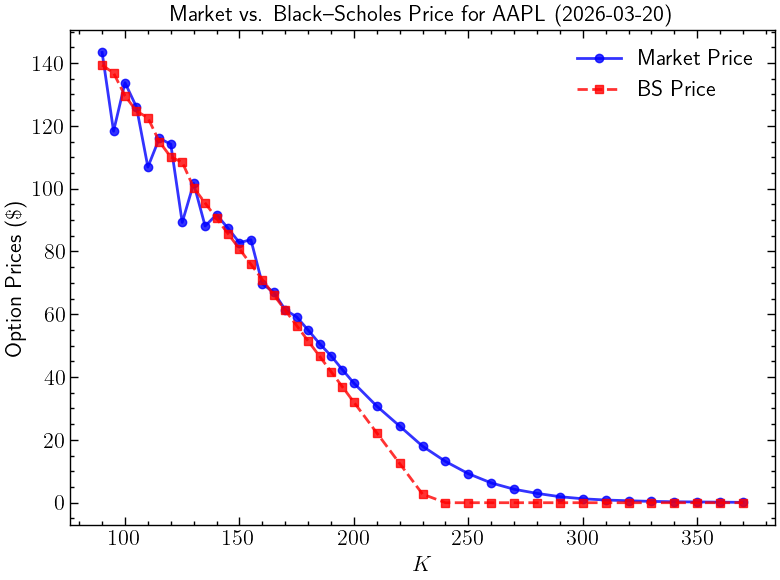

In [383]:
import matplotlib.pyplot as plt
import scienceplots

plt.style.use(['science', 'notebook', 'grid'])
plt.rcParams['text.usetex'] = True
plt.figure(figsize=(8,6))
plt.plot(df_bs["Strike"], df_bs["MarketPrice"], 'o-', color = 'blue', label="Market Price", alpha=0.8)
plt.plot(df_bs["Strike"], df_bs["BS_Price"], 's--', color = 'red', label="BS Price", alpha=0.8)
plt.xlabel("$K$")
plt.ylabel("Option Prices ($\$$)")
plt.title(f"Market vs. Black–Scholes Price for {ticker} ({expiry})")
plt.legend(frameon = False)
plt.grid(False)
plt.tight_layout()
plt.show()

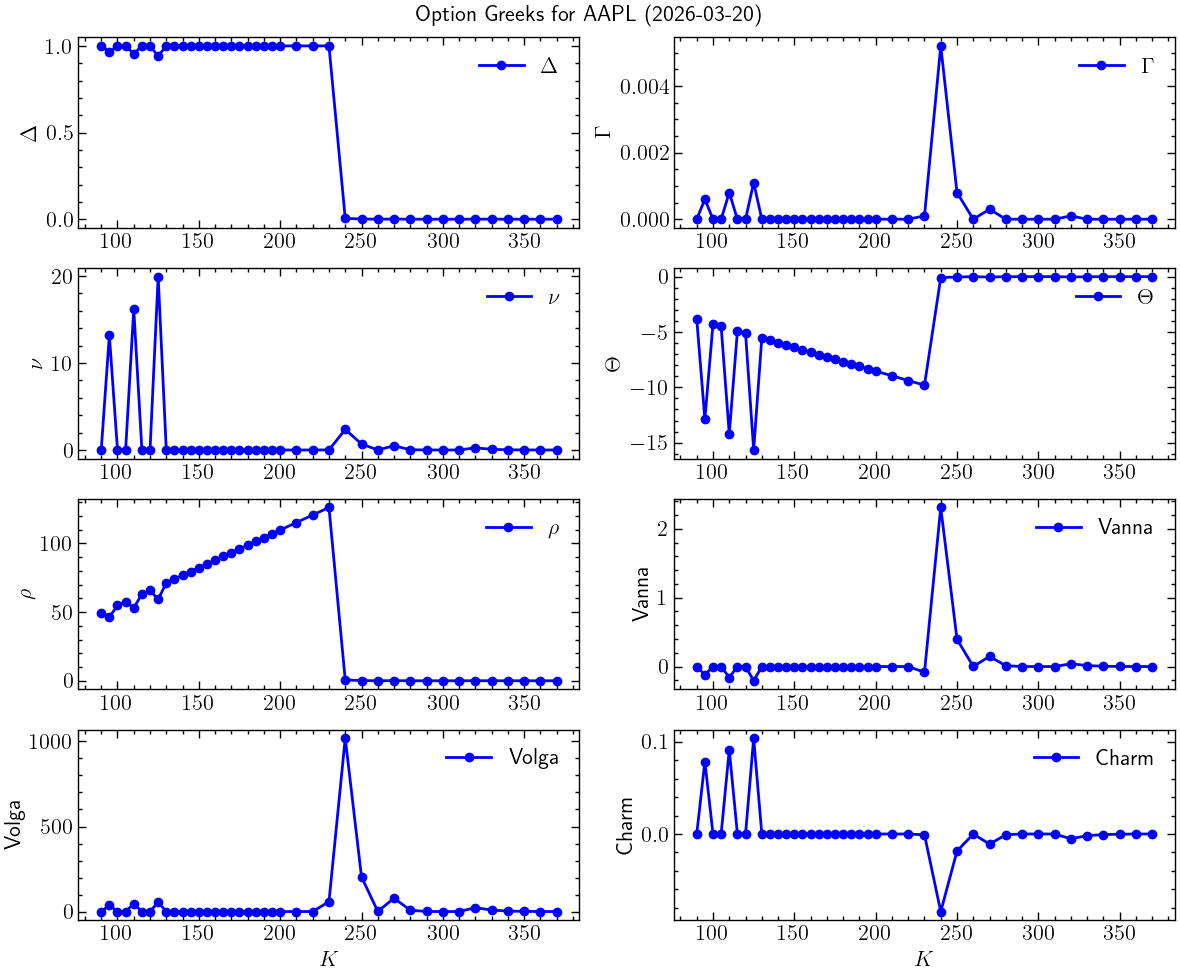

In [384]:
# Mapping of Greeks to LaTeX symbols
greek_labels = {
    "Delta": r"$\Delta$",
    "Gamma": r"$\Gamma$",
    "Vega": r"$\nu$",
    "Theta": r"$\Theta$",
    "Rho": r"$\rho$",
    "Vanna": r"$\text{Vanna}$",
    "Volga": r"$\text{Volga}$",
    "Charm": r"$\text{Charm}$"
}

# Plotting the Greeks
fig, axes = plt.subplots(4, 2, figsize=(12,10))
greeks = ["Delta","Gamma","Vega","Theta","Rho", "Vanna", "Volga", "Charm"]

for i, greek in enumerate(greeks):
    ax = axes[i//2, i%2]
    ax.plot(df_bs["Strike"], df_bs[greek], 'o-', color = 'blue', label=greek_labels[greek])

    # Only show xlabel for the last row
    if i // 2 == 3:   # last row (row index 3)
        ax.set_xlabel("$K$")  # Strike
    ax.set_ylabel(greek_labels[greek])
    ax.grid(False)
    ax.legend(frameon=False)

fig.suptitle(f"Option Greeks for {ticker} ({expiry})", fontsize=16)
plt.tight_layout()
plt.show()


# **Binomial Model**

## Theoretical Example

<Figure size 1200x800 with 0 Axes>

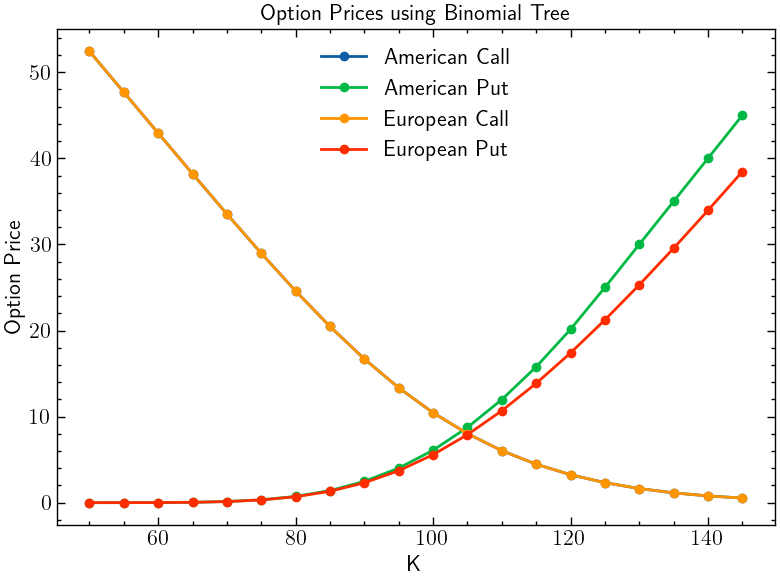

In [385]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots

class BinomialTreeOptionStable:
    def __init__(self, S0, K, T, r, sigma, N=200, option_type='C', exercise='E', q=0.0):
        self.S0 = S0
        self.K = K
        self.T = T
        self.r = r
        self.sigma = sigma
        self.N = max(N, int(T*500))  # ensure enough steps
        self.option_type = option_type
        self.exercise = exercise
        self.q = q

    def price_br(self):
        dt = self.T / self.N
        u = np.exp(self.sigma * np.sqrt(dt))
        d = 1 / u
        disc = np.exp(-self.r * dt)
        p = (np.exp((self.r - self.q) * dt) - d) / (u - d)
        p = np.clip(p, 0, 1)

        # log-space to avoid overflow
        logS = np.log(self.S0) + np.arange(self.N, -1, -1) * np.log(d) + np.arange(0, self.N + 1) * np.log(u)
        ST = np.exp(logS)

        if self.option_type == 'C':
            V = np.maximum(ST - self.K, 0)
        else:
            V = np.maximum(self.K - ST, 0)

        for i in range(self.N-1, -1, -1):
            V = disc * (p * V[1:i+2] + (1-p) * V[0:i+1])
            if self.exercise == 'A':
                logS_i = np.log(self.S0) + np.arange(i, -1, -1) * np.log(d) + np.arange(0, i+1) * np.log(u)
                ST_i = np.exp(logS_i)
                if self.option_type == 'C':
                    V = np.maximum(V, ST_i - self.K)
                else:
                    V = np.maximum(V, self.K - ST_i)
        return float(V[0])

    # Calcuating Greeks using Finite Differences methods
    def price_with(self, S0=None, sigma=None, r=None, T=None):
        old_S, old_sigma, old_r, old_T = self.S0, self.sigma, self.r, self.T
        if S0 is not None: self.S0 = S0
        if sigma is not None: self.sigma = sigma
        if r is not None: self.r = r
        if T is not None: self.T = T
        value = self.price_br()
        # restore
        self.S0, self.sigma, self.r, self.T = old_S, old_sigma, old_r, old_T
        return value

    def binomial_greeks(self, eps = 1e-4):
        V0 = self.price_br()

        # Delta
        V_plus = self.price_with(S0=self.S0 + eps)
        V_minus = self.price_with(S0=self.S0 - eps)
        delta = (V_plus - V_minus) / (2 * eps)

        # Gamma
        gamma = (V_plus - 2*V0 + V_minus) / (eps**2)

        # Vega
        V_plus = self.price_with(sigma=self.sigma + eps)
        V_minus = self.price_with(sigma=self.sigma - eps)
        vega = (V_plus - V_minus) / (2 * eps)

        # Theta
        V_minus = self.price_with(T=self.T - eps)
        theta = (V0 - V_minus) / eps

        # Rho
        V_plus = self.price_with(r=self.r + eps)
        V_minus = self.price_with(r=self.r - eps)
        rho = (V_plus - V_minus) / (2 * eps)

        # Vanna
        V_pp = self.price_with(S0=self.S0+eps, sigma=self.sigma+eps)
        V_pm = self.price_with(S0=self.S0+eps, sigma=self.sigma-eps)
        V_mp = self.price_with(S0=self.S0-eps, sigma=self.sigma+eps)
        V_mm = self.price_with(S0=self.S0-eps, sigma=self.sigma-eps)
        vanna = (V_pp - V_pm - V_mp + V_mm) / (4*eps**2)

        # Volga
        V_plus = self.price_with(sigma=self.sigma + eps)
        V_minus = self.price_with(sigma=self.sigma - eps)
        volga = (V_plus - 2*V0 + V_minus) / (eps**2)

        # Charm
        delta_T_minus = (self.price_with(S0=self.S0+eps, T=self.T-eps) -
                         self.price_with(S0=self.S0-eps, T=self.T-eps)) / (2*eps)
        charm = (delta - delta_T_minus) / eps

        return {
            "Delta": delta,
            "Gamma": gamma,
            "Vega": vega,
            "Theta": theta,
            "Rho": rho,
            "Vanna": vanna,
            "Volga": volga,
            "Charm": charm
        }


# Changing the strikes
if __name__ == "__main__":
    option_results_bn = []
    for i in np.arange(50, 150, 5):
        params = dict(S0=100, K=i, r=0.05, sigma=0.20, T=1, N=100)
        american_call = BinomialTreeOptionStable(**params, exercise='A', option_type='C').price_br()
        american_put = BinomialTreeOptionStable(**params, exercise='A', option_type='P').price_br()
        european_call = BinomialTreeOptionStable(**params, exercise='E', option_type='C').price_br()
        european_put = BinomialTreeOptionStable(**params, exercise='E', option_type='P').price_br()
        greeks = BinomialTreeOptionStable(**params, exercise='E', option_type='C').binomial_greeks()
        option_results_bn.append((i, american_call, american_put, european_call, european_put, greeks['Delta'], greeks['Gamma']))

# Creating the dataframe of the results
df_results_bn = pd.DataFrame(option_results_bn, columns=['Strike','American Call','American Put','European Call','European Put', 'Delta', 'Gamma'])
df_results_bn.set_index('Strike', inplace=True)

# Plotting the results
plt.style.use(['science', 'notebook', 'grid'])
plt.rcParams['text.usetex'] = True
plt.figure(figsize=(12,8))
df_results_bn.iloc[:,:4].plot(marker='o')
plt.xlabel('K')
plt.ylabel('Option Price')
plt.title('Option Prices using Binomial Tree')
plt.legend(frameon=False)
plt.grid(False)
plt.tight_layout()
plt.show()

## Market Chains

Current AAPL price: $227.16
Nearest expiration: 2026-03-20


<Figure size 1200x800 with 0 Axes>

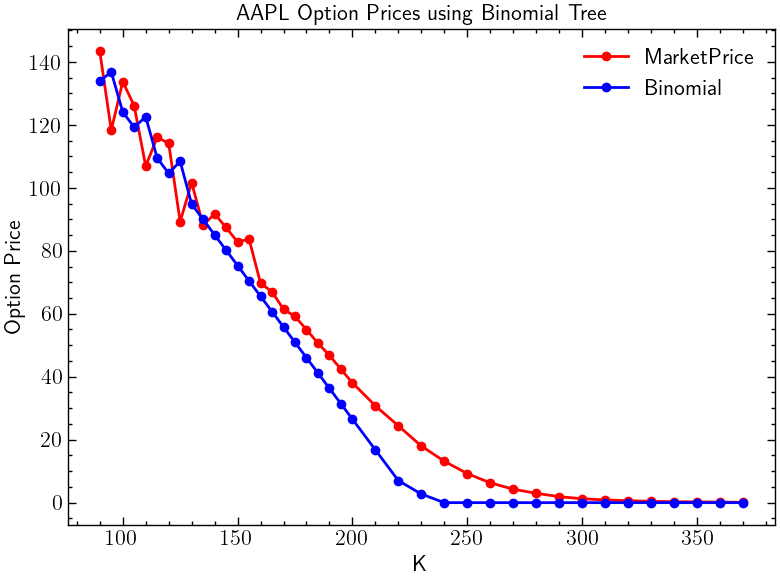

In [386]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime
import scienceplots

# Helper function
def time_to_expiry(expiry):
    expiry_date = datetime.strptime(expiry, "%Y-%m-%d")
    today = datetime.today()
    T = (expiry_date - today).days / 365   # in years
    return max(T, 0)

# Extracting the data
def get_option_chain(ticker):
    """Fetch current option chain for a ticker"""
    stock = yf.Ticker(ticker)

    # Get current price
    S = stock.history(period="1d")['Close'].iloc[-1]
    print(f"Current {ticker} price: ${S:.2f}")

    # Get nearest expiration (option expires in next 6 months)
    expirations = stock.options
    nearest_expiry = expirations[11]
    print(f"Nearest expiration: {nearest_expiry}")

    # Get option chain
    chain = stock.option_chain(nearest_expiry)
    calls = chain.calls
    puts = chain.puts

    return calls, puts, S, nearest_expiry


# tickers chosen for the options data
ticker = "AAPL"
calls, puts, S, expiry = get_option_chain(ticker)

# Show some calls
calls[['strike', 'lastPrice', 'impliedVolatility']].tail()


# Risk-free rate
r = 0.0437
T = time_to_expiry(expiry)

# Calculate Binomial Prices and Greeks
option_results_bn = []

for i, row in calls.iterrows():
    K = row['strike']
    sigma = row['impliedVolatility']
    market_price = row['lastPrice']

    params = dict(S0=S, K=K, r=r, sigma=sigma, T=T, N=150)  # N=150 for smoother tree

    # European Call
    bn_model = BinomialTreeOptionStable(**params, exercise='E', option_type='C')
    model_price = bn_model.price_br()
    greeks = bn_model.binomial_greeks()

    option_results_bn.append({
        "Strike": K,
        "MarketPrice": market_price,
        "Binomial": round(model_price, 2),
        "IV": round(sigma, 4),
        "Delta": round(greeks['Delta'], 4),
        "Gamma": round(greeks['Gamma'], 4),
        "Vega": round(greeks['Vega'], 4),
        "Theta": round(greeks['Theta'], 4),
        "Rho": round(greeks['Rho'], 4),
        "Vanna": round(greeks['Vanna'], 4),
        "Volga": round(greeks['Volga'], 4),
        "Charm": round(greeks['Charm'], 4)
    })

df_bn = pd.DataFrame(option_results_bn)
df_bn.set_index('Strike', inplace=True)
df_bn.head()

# Plotting the results
plt.style.use(['science', 'notebook', 'grid'])
plt.rcParams['text.usetex'] = True
plt.figure(figsize=(12,8))
df_bn[['MarketPrice','Binomial']].plot(marker='o', color = ['red', 'blue'])
plt.xlabel('K')
plt.ylabel('Option Price ')
plt.title(f'{ticker} Option Prices using Binomial Tree')
plt.legend(frameon=False)
plt.grid(False)
plt.tight_layout()
plt.show()

In [387]:
df_bn.head()

,MarketPrice,Binomial,IV,Delta,Gamma,Vega,Theta,Rho,Vanna,Volga,Charm
Strike,,,,,,,,,,,
90.0,143.37,133.86,0.0000,0.9759,0.0,278.3087,-5.8250,-75.1830,1.2252,5.006765e+07,-0.0426
95.0,118.29,136.83,0.7900,0.9665,-0.0,12.7764,12.5857,46.2578,0.0240,6.246000e-01,0.0224
100.0,133.75,124.10,0.0000,0.9759,-0.0,278.3087,-5.3986,-69.7027,1.2252,5.006765e+07,-0.0425
105.0,126.00,119.23,0.0000,0.9759,-0.0,278.3087,-5.1854,-66.9626,1.2252,5.006765e+07,-0.0425
110.0,106.88,122.57,0.6993,0.9539,-0.0,16.4160,14.3425,52.9720,0.0298,1.456500e+00,0.0266


# **Trinomial Model**

To make it simple, I implement a very stable choice -- Boyle’s (1986) formulation for the trinomial tree:

$$
dx = \sigma \sqrt{2 \, dt}, \quad u = e^{dx}, \quad d = \frac{1}{u}
$$

The risk-neutral probabilities are:

$$
p_u = \frac{1}{2} \left[ \frac{\sigma^2 dt + \left( (r-q-\frac{1}{2}\sigma^2) dt \right)^2}{dx^2} + \frac{(r-q-\frac{1}{2}\sigma^2) dt}{dx} \right]
$$

$$
p_m = 1 - \frac{\sigma^2 dt + \left( (r-q-\frac{1}{2}\sigma^2) dt \right)^2}{dx^2}
$$

$$
p_d = \frac{1}{2} \left[ \frac{\sigma^2 dt + \left( (r-q-\frac{1}{2}\sigma^2) dt \right)^2}{dx^2} - \frac{(r-q-\frac{1}{2}\sigma^2) dt}{dx} \right]
$$

Where:  

- \(dx\) is the size of the log-price movement.  
- \(u\) and \(d\) are the up and down factors.  
- \(p_u, p_m, p_d\) are the probabilities of moving up, staying the same, or moving down in the next step.  
- \(r\) is the risk-free rate, \(q\) is the dividend yield, and \(\sigma\) is the volatility.


## Theoretical Example

<Figure size 1200x800 with 0 Axes>

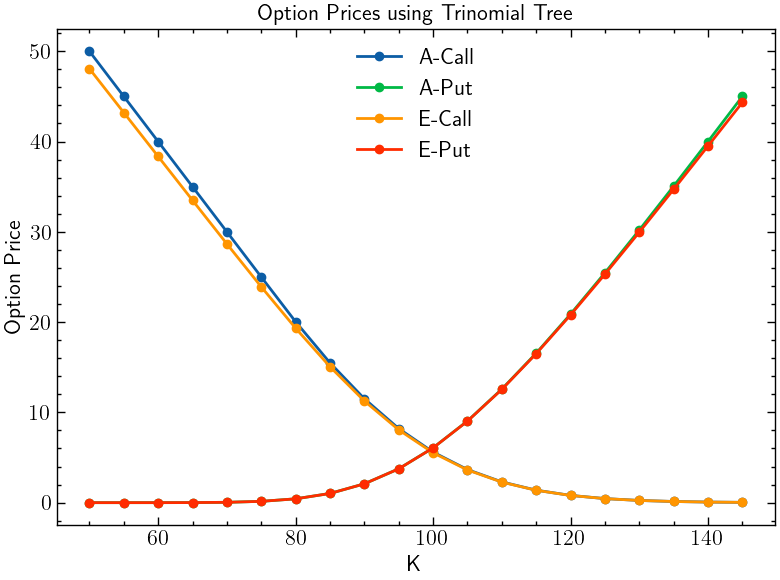

In [388]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots

class TrinomialTreeOptionStable:
    def __init__(self, S0, K, T, r, sigma, N=200, option_type='C', exercise='E', q=0.0):
        self.S0 = S0
        self.K = K
        self.T = T
        self.r = r
        self.sigma = sigma
        self.N = max(N, int(T*500))  # ensure enough steps
        self.option_type = option_type
        self.exercise = exercise
        self.q = q

    def price_tr(self):
        dt = self.T / self.N
        disc = np.exp(-self.r * dt)

        dx = self.sigma * np.sqrt(2 * dt)
        nu = (self.r - self.q - 0.5 * self.sigma**2) * dt

        pu = 0.5 * ((self.sigma**2 * dt + nu**2) / dx**2 + nu/dx)
        pm = 1 - (self.sigma**2 * dt + nu**2) / dx**2
        pd = 0.5 * ((self.sigma**2 * dt + nu**2) / dx**2 - nu/dx)

        # normalize to ensure pu+pm+pd = 1
        pu, pm, pd = np.clip([pu, pm, pd], 0, 1)
        s = pu + pm + pd
        pu, pm, pd = pu/s, pm/s, pd/s

        # terminal stock prices
        idx = np.arange(-self.N, self.N+1)
        ST = self.S0 * np.exp(idx * dx)

        # terminal payoff
        if self.option_type == 'C':
            V = np.maximum(ST - self.K, 0)
        else:
            V = np.maximum(self.K - ST, 0)

        # backward induction
        for j in range(self.N, 0, -1):
            V_new = np.zeros(2*j - 1)
            for k in range(len(V_new)):
                V_new[k] = disc * (pu*V[k] + pm*V[k+1] + pd*V[k+2])
            V = V_new

            # American adjustment
            if self.exercise == 'A':
                idx_j = np.arange(-j+1, j)  # exactly 2j-1 nodes
                ST_j = self.S0 * np.exp(idx_j * dx)
                if self.option_type == 'C':
                    V = np.maximum(V, ST_j - self.K)
                else:
                    V = np.maximum(V, self.K - ST_j)

        return float(V[0])


    # helper for Greeks
    def price_with(self, **kwargs):
        old = (self.S0, self.K, self.T, self.r, self.sigma, self.q)
        if "S0" in kwargs: self.S0 = kwargs["S0"]
        if "K" in kwargs: self.K = kwargs["K"]
        if "T" in kwargs: self.T = kwargs["T"]
        if "r" in kwargs: self.r = kwargs["r"]
        if "sigma" in kwargs: self.sigma = kwargs["sigma"]
        if "q" in kwargs: self.q = kwargs["q"]

        value = self.price_tr()
        self.S0, self.K, self.T, self.r, self.sigma, self.q = old
        return value

    def trinomial_greeks(self):
        eps = min(1e-4, self.S0 * 1e-3, self.T / 100)
        V0 = self.price_tr()

        # Delta
        V_plus = self.price_with(S0=self.S0 + eps)
        V_minus = self.price_with(S0=self.S0 - eps)
        delta = (V_plus - V_minus) / (2 * eps)

        # Gamma
        gamma = (V_plus - 2 * V0 + V_minus) / (eps ** 2)

        # Vega
        V_plus = self.price_with(sigma=self.sigma + eps)
        V_minus = self.price_with(sigma=self.sigma - eps)
        vega = (V_plus - V_minus) / (2 * eps)

        # Theta
        V_minus = self.price_with(T=self.T - eps)
        theta = (V0 - V_minus) / eps

        # Rho
        V_plus = self.price_with(r=self.r + eps)
        V_minus = self.price_with(r=self.r - eps)
        rho = (V_plus - V_minus) / (2 * eps)


        # Vanna
        V_pp = self.price_with(S0=self.S0+eps, sigma=self.sigma+eps)
        V_pm = self.price_with(S0=self.S0+eps, sigma=self.sigma-eps)
        V_mp = self.price_with(S0=self.S0-eps, sigma=self.sigma+eps)
        V_mm = self.price_with(S0=self.S0-eps, sigma=self.sigma-eps)
        vanna = (V_pp - V_pm - V_mp + V_mm) / (4*eps**2)

        # Volga
        V_plus = self.price_with(sigma=self.sigma + eps)
        V_minus = self.price_with(sigma=self.sigma - eps)
        volga = (V_plus - 2*V0 + V_minus) / (eps**2)

        # Charm
        delta_T_minus = (self.price_with(S0=self.S0+eps, T=self.T-eps) -
                         self.price_with(S0=self.S0-eps, T=self.T-eps)) / (2*eps)
        charm = (delta - delta_T_minus) / eps

        return {
            "Delta": delta,
            "Gamma": gamma,
            "Vega": vega,
            "Theta": theta,
            "Rho": rho,
            "Vanna": vanna,
            "Volga": volga,
            "Charm": charm
        }

# Simulating the strikes and options exercise
if __name__ == "__main__":
    strikes = np.arange(50, 150, 5)
    option_results = []
    for K in strikes:
        params = dict(S0=100, K=K, r=0.05, T=0.5616, sigma=0.2, N=150, q=0.0)
        american_call = TrinomialTreeOptionStable(**params, option_type='C', exercise='A').price_tr()
        american_put = TrinomialTreeOptionStable(**params, option_type='P', exercise='A').price_tr()
        european_call = TrinomialTreeOptionStable(**params, option_type='C', exercise='E').price_tr()
        european_put = TrinomialTreeOptionStable(**params, option_type='P', exercise='E').price_tr()
        greeks = TrinomialTreeOptionStable(**params, option_type='C', exercise='E').trinomial_greeks()

        option_results.append((K, american_call, american_put, european_call, european_put,
                               greeks['Delta'], greeks['Gamma']))

    df_tr = pd.DataFrame(option_results,
                         columns=['K', 'A-Call', 'A-Put', 'E-Call', 'E-Put', 'Delta', 'Gamma']).set_index('K')

    # Plotting the sample results
    plt.style.use(['science', 'notebook', 'grid'])
    plt.rcParams['text.usetex'] = True
    plt.figure(figsize=(12, 8))
    df_tr.iloc[:, :4].plot(marker='o')
    plt.xlabel('K')
    plt.ylabel('Option Price')
    plt.title('Option Prices using Trinomial Tree')
    plt.legend(frameon=False)
    plt.grid(False)
    plt.tight_layout()
    plt.show()


In [389]:
df_tr.head()

,A-Call,A-Put,E-Call,E-Put,Delta,Gamma
K,,,,,,
50,50.0,0.000004,48.071029,0.000004,0.966864,-7.105427e-07
55,45.0,0.000091,43.209563,0.000091,0.966842,-7.105427e-07
60,40.0,0.001068,38.348986,0.001068,0.966610,2.842171e-06
65,35.0,0.007720,33.494086,0.007720,0.965361,2.842171e-06
70,30.0,0.038951,28.663762,0.038950,0.959918,-2.131628e-06


## Market Chains

Current AAPL price: $227.16
Nearest expiration: 2026-03-20


<Figure size 1200x800 with 0 Axes>

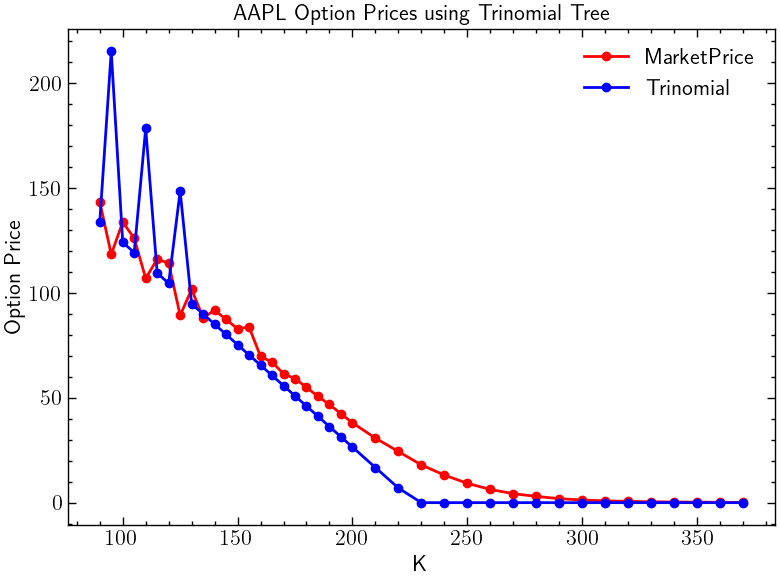

In [390]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime
import scienceplots

# Helper function
def time_to_expiry(expiry):
    expiry_date = datetime.strptime(expiry, "%Y-%m-%d")
    today = datetime.today()
    T = (expiry_date - today).days / 365   # in years
    return max(T, 0)

# Collecting the data as before
def get_option_chain(ticker):
    """Fetch current option chain for a ticker"""
    stock = yf.Ticker(ticker)

    # Get current price
    S = stock.history(period="1d")['Close'].iloc[-1]
    print(f"Current {ticker} price: ${S:.2f}")

    # Get nearest expiration (option expires in next 6 months)
    expirations = stock.options
    nearest_expiry = expirations[11]
    print(f"Nearest expiration: {nearest_expiry}")

    # Get option chain
    chain = stock.option_chain(nearest_expiry)
    calls = chain.calls
    puts = chain.puts

    return calls, puts, S, nearest_expiry


# tickers chosen for the options data
ticker = "AAPL"
calls, puts, S, expiry = get_option_chain(ticker)

# Show some calls
calls[['strike', 'lastPrice', 'impliedVolatility']].tail()


# Risk-free rate
r = 0.0437
T = time_to_expiry(expiry)

# Calculate Trinomial Prices and Greeks
option_results_tr = []

for i, row in calls.iterrows():
    K = row['strike']
    sigma = row['impliedVolatility']  # Already in decimal
    market_price = row['lastPrice']

    params = dict(S0=S, K=K, r=r, sigma=sigma, T=T, N=150)  # N=150 for smoother tree

    # European Call
    tr_model = TrinomialTreeOptionStable(**params, exercise='E', option_type='C')
    model_price = tr_model.price_tr()
    greeks = tr_model.trinomial_greeks()

    option_results_tr.append({
        "Strike": K,
        "MarketPrice": market_price,
        "Trinomial": round(model_price, 2),
        "IV": round(sigma, 4),
        "Delta": round(greeks['Delta'], 4),
        "Gamma": round(greeks['Gamma'], 4),
        "Vega": round(greeks['Vega'], 4),
        "Theta": round(greeks['Theta'], 4),
        "Rho": round(greeks['Rho'], 4),
        "Vanna": round(greeks['Vanna'], 4),
        "Volga": round(greeks['Volga'], 4),
        "Charm": round(greeks['Charm'], 4)
    })

df_tr = pd.DataFrame(option_results_tr)
df_tr.set_index('Strike', inplace=True)
df_tr.head()

# Plotting the results
plt.style.use(['science', 'notebook', 'grid'])
plt.rcParams['text.usetex'] = True
plt.figure(figsize=(12,8))
df_tr[['MarketPrice','Trinomial']].plot(marker='o', color = ['red', 'blue'])
plt.xlabel('K')
plt.ylabel('Option Price ')
plt.title(f'{ticker} Option Prices using Trinomial Tree')
plt.legend(frameon=False)
plt.grid(False)
plt.tight_layout()
plt.show()

In [391]:
df_tr.head()

,MarketPrice,Trinomial,IV,Delta,Gamma,Vega,Theta,Rho,Vanna,Volga,Charm
Strike,,,,,,,,,,,
90.0,143.37,133.83,0.0000,0.9758,-0.0,0.0025,-5.8486,-75.1673,0.0000,248.9795,-0.0426
95.0,118.29,215.14,0.7900,1.3383,-0.0,275.8237,171.3097,-291.5042,1.2297,573.7606,0.7453
100.0,133.75,124.08,0.0000,0.9758,-0.0,0.0025,-5.4222,-69.6871,0.0000,248.9795,-0.0426
105.0,126.00,119.20,0.0000,0.9758,0.0,0.0025,-5.2090,-66.9469,0.0000,248.9795,-0.0426
110.0,106.88,178.40,0.6993,1.2325,-0.0,228.5818,122.2872,-257.3396,1.0290,477.1636,0.5287


# **Comparing Results**

In [392]:
print(df_bs.columns)
print(df_bn.columns)
print(df_tr.columns)

Index(['Strike', 'MarketPrice', 'BS_Price', 'IV', 'Delta', 'Gamma', 'Vega',
       'Theta', 'Rho', 'Vanna', 'Volga', 'Charm'],
      dtype='object')
Index(['MarketPrice', 'Binomial', 'IV', 'Delta', 'Gamma', 'Vega', 'Theta',
       'Rho', 'Vanna', 'Volga', 'Charm'],
      dtype='object')
Index(['MarketPrice', 'Trinomial', 'IV', 'Delta', 'Gamma', 'Vega', 'Theta',
       'Rho', 'Vanna', 'Volga', 'Charm'],
      dtype='object')


<>:19: SyntaxWarning: invalid escape sequence '\$'
<>:19: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-3331215343.py:19: SyntaxWarning: invalid escape sequence '\$'
  plt.ylabel("Option Price ($\$$)")


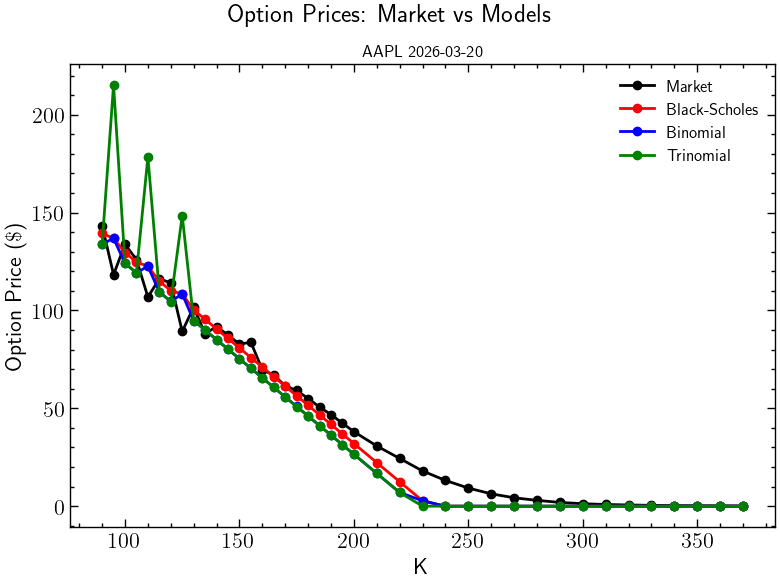

In [393]:
# Plotting the Prices and strikes
import matplotlib.pyplot as plt
import scienceplots

# Merge the three dataframes on Strike
df_all = df_bs.merge(df_bn, on="Strike", suffixes=("_BS", "_BN"))
df_all = df_all.merge(df_tr, on="Strike")
df_all.rename(columns=lambda x: x.replace("_x","_TR").replace("_y",""), inplace=True)

# Model Prices vs Market Prices
plt.style.use(['science', 'notebook', 'grid'])
plt.rcParams['text.usetex'] = True
plt.figure(figsize=(8,6))
plt.plot(df_all["Strike"], df_all["MarketPrice"], "o-", color = 'black', label="Market")
plt.plot(df_all["Strike"], df_all["BS_Price"], "o-", color = 'red', label="Black-Scholes")
plt.plot(df_all["Strike"], df_all["Binomial"], "o-", color = 'blue',  label="Binomial")
plt.plot(df_all["Strike"], df_all["Trinomial"], "o-", color = 'green' , label="Trinomial")
plt.xlabel("K")
plt.ylabel("Option Price ($\$$)")
plt.suptitle("Option Prices: Market vs Models", fontsize = 18)
plt.title(f"{ticker} {expiry}", fontsize = 12)
plt.legend(frameon = False, fontsize = 12)
plt.grid(False)
plt.tight_layout()
plt.show()


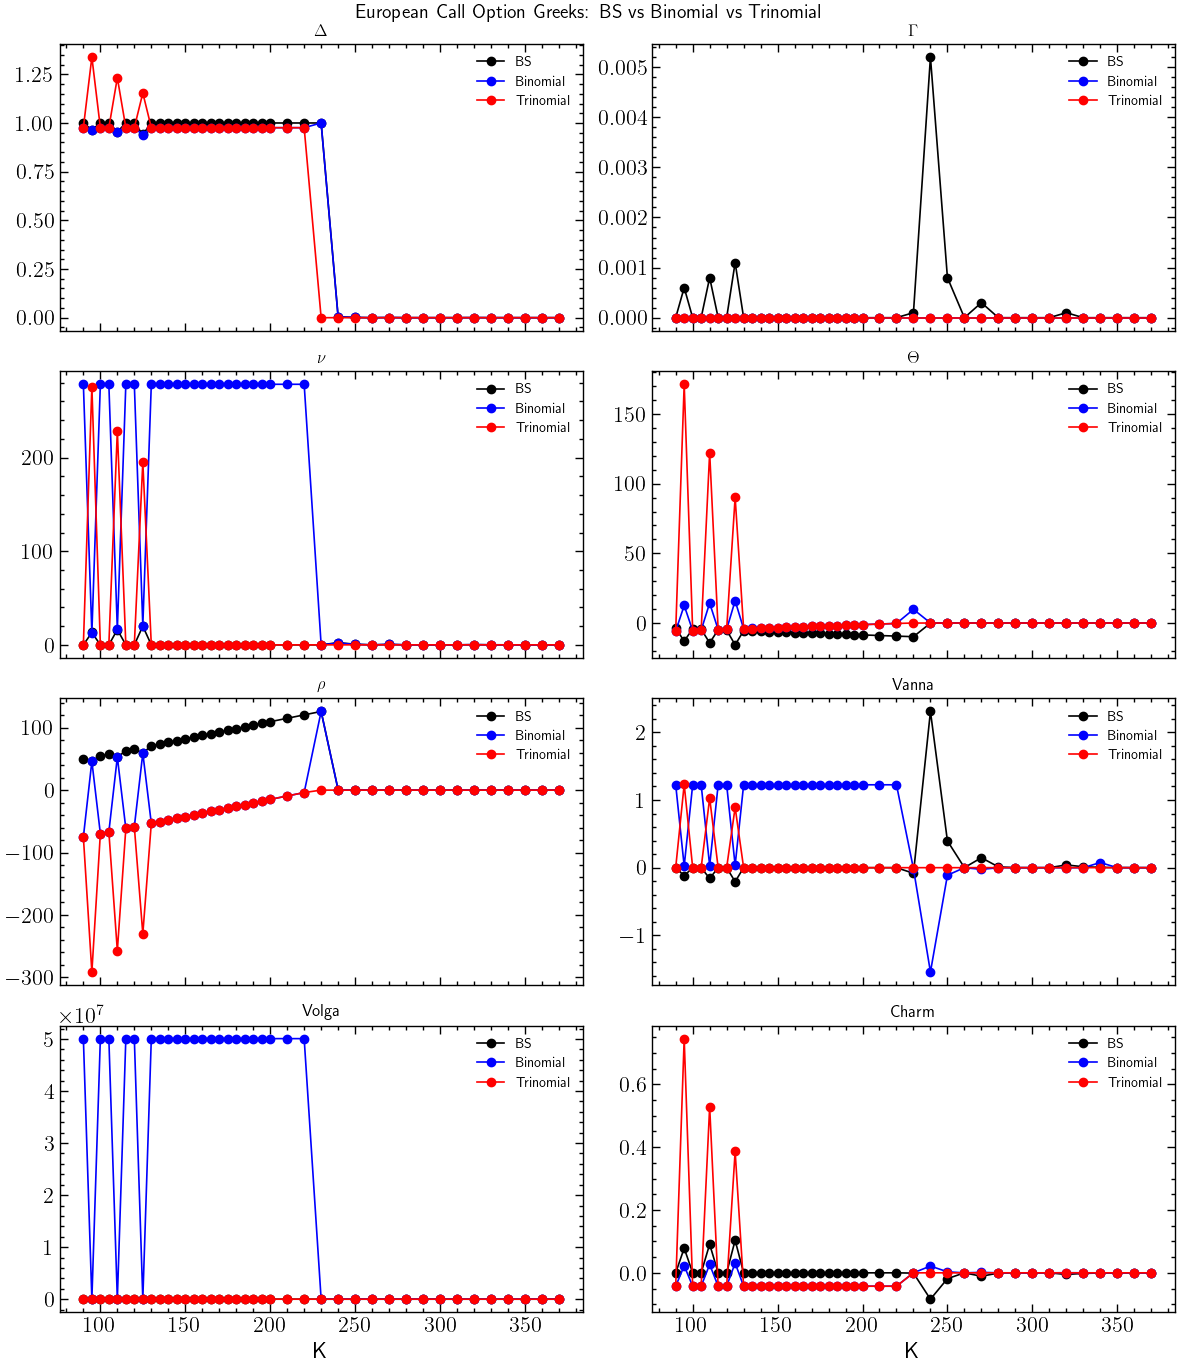

In [394]:
# Plotting the Greeks
df_bn = df_bn.drop(columns=["level_0", "index"], errors="ignore")
df_tr = df_tr.drop(columns=["level_0", "index"], errors="ignore")

greeks = ["Delta", "Gamma", "Vega", "Theta", "Rho", "Vanna", "Volga", "Charm"]

df_bs_ren = df_bs.copy()
df_bs_ren.rename(columns={g: f"{g}_BS" for g in greeks}, inplace=True)

df_bn_ren = df_bn.copy()
df_bn_ren.rename(columns={g: f"{g}_BN" for g in greeks}, inplace=True)

df_tr_ren = df_tr.copy()
df_tr_ren.rename(columns={g: f"{g}_TR" for g in greeks}, inplace=True)

# Merge all
df_all = df_bs_ren.merge(df_bn_ren, on=["Strike", "MarketPrice", "IV"])
df_all = df_all.merge(df_tr_ren, on=["Strike", "MarketPrice", "IV"])

# Symbol map for titles
symbol_map = {
    "Delta": r"$\Delta$",
    "Gamma": r"$\Gamma$",
    "Vega": r"$\nu$",
    "Theta": r"$\Theta$",
    "Rho": r"$\rho$",
    "Vanna": "Vanna",
    "Volga": "Volga",
    "Charm": "Charm"
}

# Plot (4x2)
plt.style.use(['science', 'notebook', 'grid'])
plt.rcParams['text.usetex'] = True
fig, axes = plt.subplots(4, 2, figsize=(12, 14), sharex=True)

for ax, greek in zip(axes.flat, greeks):
    ax.plot(df_all["Strike"], df_all[f"{greek}_BS"], "-o", color='black', lw=1.2, label="BS")
    ax.plot(df_all["Strike"], df_all[f"{greek}_BN"], "-o", color='blue', lw=1.2, label="Binomial")
    ax.plot(df_all["Strike"], df_all[f"{greek}_TR"], "-o", color='red', lw=1.2, label="Trinomial")
    ax.set_title(symbol_map[greek], fontsize=12)
    ax.grid(False)
    ax.legend(frameon=False, fontsize=10)

axes[-1,0].set_xlabel("K")
axes[-1,1].set_xlabel("K")

fig.suptitle("European Call Option Greeks: BS vs Binomial vs Trinomial", fontsize=14)
plt.tight_layout()
plt.show()

# **Reflections**

When comparing Greeks across **Black–Scholes (BS)**, **Binomial (BN)**, and **Trinomial (TR)** models, we observe noticeable differences.  
These differences arise from the theoretical assumptions and numerical approximations of each method.

---

### 1. Assumptions

- **Black–Scholes (BS)**
  - Continuous trading, frictionless markets (no transaction costs, taxes, or bid–ask spreads).
  - Constant volatility (`σ`) and risk-free interest rate (`r`).
  - Lognormal distribution of underlying asset prices.
  - European-style exercise (no early exercise).
  - No dividends (unless modified with continuous yield `q`).

- **Binomial and Trinomial Trees**
  - Discrete-time approximation to the continuous process.
  - Finite number of steps (`N`) to maturity.
  - Asset prices can only move to specific discrete states (up, down, or neutral in TR).
  - Risk-neutral valuation principle is applied at each node.
  - Can handle **American options** (early exercise possible).
  - Convergence to BS requires large `N`.

---

### 2. Limitations

- **Black–Scholes**
  - Unrealistic constant volatility and interest rate assumption.
  - Poor fit to market data with volatility smiles/skews.
  - Cannot value American options (except dividend-free calls).
  - Greeks may diverge from reality under stochastic volatility or jumps.

- **Binomial Tree**
  - Greeks are sensitive to the number of steps (`N`).
  - Approximation errors if `N` is too small.
  - Slower convergence compared to BS.
  - Computationally more expensive than closed-form BS.

- **Trinomial Tree**
  - More stable than Binomial but still dependent on `N`.
  - Implementation complexity increases with more steps.
  - Still assumes constant volatility and interest rates.
  - Larger memory requirement for storing nodes.

---

### 3. Reasons for Differences in Greeks

- **Discretization error**: Binomial/Trinomial trees approximate continuous dynamics; errors shrink as `N → ∞`.
- **Boundary conditions**: Early exercise features (American options) create deviations in Delta, Theta, and Charm.
- **Numerical stability**: Vega, Volga, and higher-order Greeks are particularly unstable in tree methods due to finite differences.
- **Market vs Model**: Market-implied Greeks incorporate volatility smiles/skews, while BS/trees assume flat volatility.

---

### 4. Ways to Improve

- **Increase steps (`N`)** in Binomial/Trinomial trees for better convergence to BS.
- **Use implied volatility surface** instead of constant `σ` for more realistic Greeks.
- **Calibrate models** (e.g., local volatility, stochastic volatility, SABR, Heston) to market data.
- **Variance reduction techniques** for numerical stability in Vega, Volga, and higher-order Greeks.
- **Hybrid approaches**: Use BS for speed, and trees or finite difference PDE solvers for early-exercise and exotic features.
- **Monte Carlo with Greeks via pathwise or likelihood ratio methods** for robustness under complex dynamics.

---

📌 **Takeaway:**  
- **BS Greeks** are fast and analytically neat but rely on restrictive assumptions.  
- **Binomial/Trinomial Greeks** provide flexibility (esp. for American options) but introduce discretization error.  
- For practical trading and risk management, **market-calibrated models with volatility surfaces** give the most reliable Greeks.


# **References**

- Black, F., & Scholes, M. (1973). The pricing of options and corporate liabilities. *Journal of Political Economy*, 81(3), 637–654.

- Merton, R. C. (1973). Theory of rational option pricing. *Bell Journal of Economics and Management Science*, 4(1), 141–183.

- Hull, J. C. (2017). *Options, futures, and other derivatives (11th ed.)*. Pearson.

- Wilmott, P. (2006). *Paul Wilmott introduces quantitative finance (2nd ed.)*. Wiley.

- Haug, E. G. (2007). *The complete guide to option pricing formulas (2nd ed.)*. McGraw-Hill.

- Shreve, S. E. (2004). *Stochastic calculus for finance II: Continuous-time models*. Springer.




<span style="font-family:'cursive'; font-size:10px;">
&nbsp;<strong>Disclaimer:</strong> <br>  
The content and code in this notebook are intended for educational and illustrative purposes only. Option pricing involves risk, and the models presented here rely on assumptions that may not fully reflect real market conditions. Users should exercise caution, perform their own research, and consult a qualified financial professional before making any investment or trading decisions.&nbsp;
</span>